<a href="https://www.kaggle.com/code/sivas1292/heart-failure-prediction-app-using-streamlit?scriptVersionId=204675979" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")
# pd.set_option('future.no_silent_downcasting', True)
pd.options.mode.copy_on_write = "warn"

**Load the Data**

In [3]:
df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")

**EDA**

In [4]:
df.shape

(918, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
df.describe(include="object").T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [9]:
# Check Nan Values
np.round(df.isna().sum() / len(df) * 100, 3)

Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

In [10]:
# Check Duplicates Records
df.duplicated().sum()

0

**Column Wise Analysis**

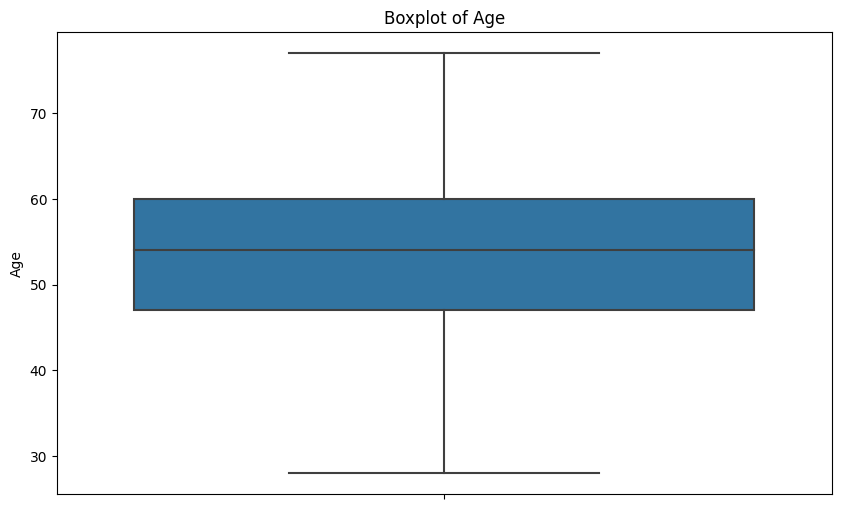

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

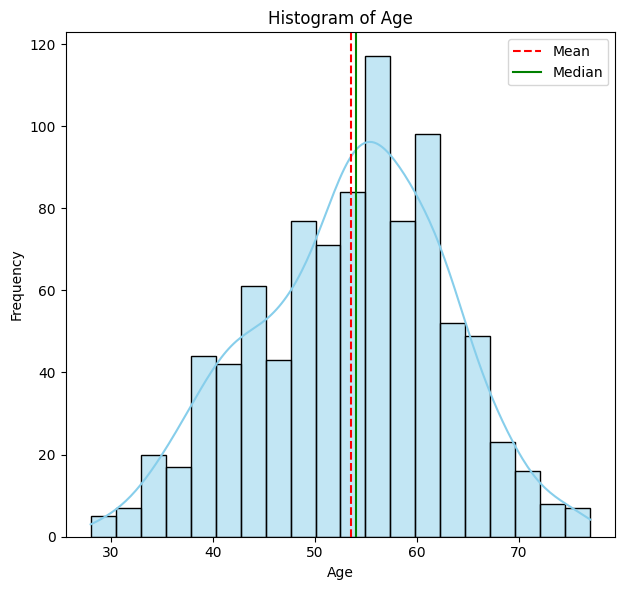

In [12]:
plt.figure(figsize=(12, 6))

# Calculate mean and median
mean_age = df['Age'].mean()
median_age = df['Age'].median()

# Create a histogram for the 'age' column
plt.subplot(1, 2, 2)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add mean and median lines to the histogram
plt.axvline(mean_age, color='red', linestyle='--', label='Mean')
plt.axvline(median_age, color='green', linestyle='-', label='Median')

# Adding the legend to the histogram
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

It can be seen that the Age has a Slight Left Skewness 

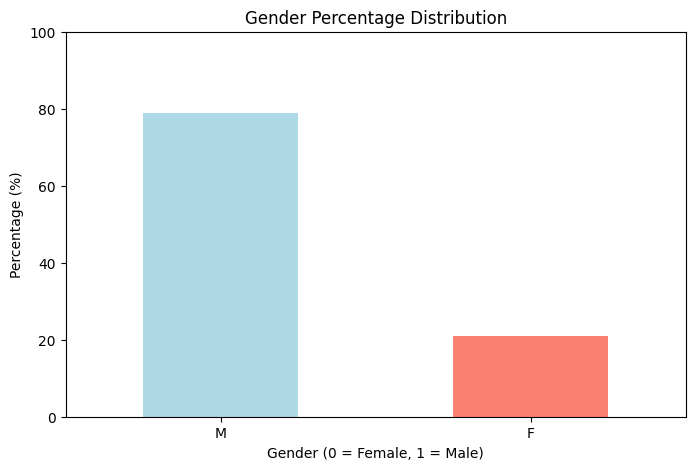

In [13]:
# Calculate the percentage of each gender
gender_counts = df['Sex'].value_counts(normalize=True) * 100  # Normalize to get percentage

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a bar plot for gender percentages
gender_counts.plot(kind='bar', color=['lightblue', 'salmon'])

# Customize the title and labels
plt.title('Gender Percentage Distribution')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Percentage (%)')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.ylim(0, 100)  # Set y-axis limits from 0 to 100
plt.show()

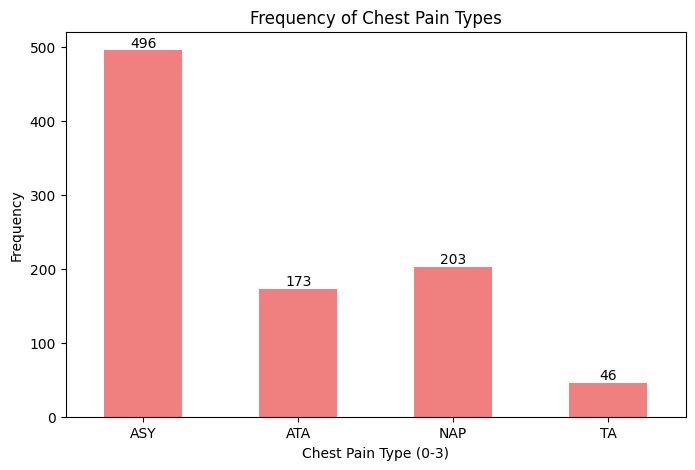

In [14]:
# Count the frequency of each chest pain type
chest_pain_counts = df['ChestPainType'].value_counts().sort_index()  # Sort by index for better order

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a bar plot for chest pain type frequencies
bars = chest_pain_counts.plot(kind='bar', color='lightcoral')

# Customize the title and labels
plt.title('Frequency of Chest Pain Types')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Frequency')

# Show the frequency on top of each bar
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.show()

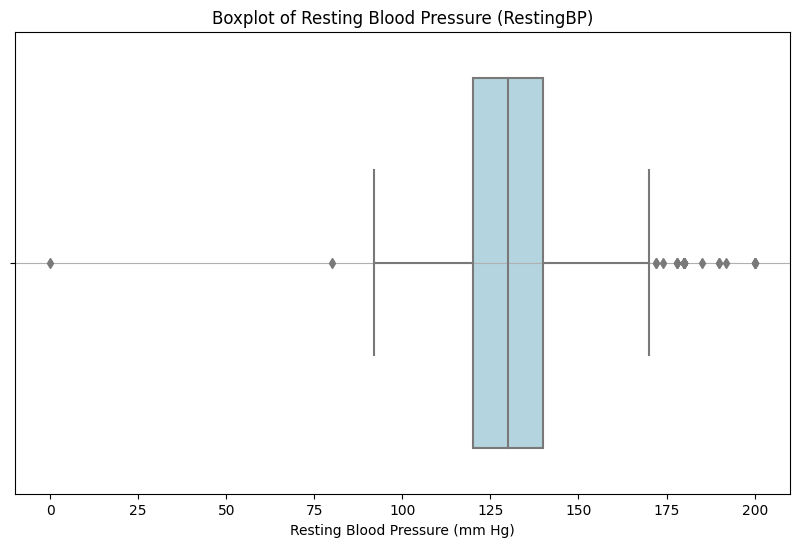

In [15]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a boxplot for the 'RestingBP' column
sns.boxplot(x=df['RestingBP'], color='lightblue')

# Customize the title and labels
plt.title('Boxplot of Resting Blood Pressure (RestingBP)')
plt.xlabel('Resting Blood Pressure (mm Hg)')

# Show the plot
plt.grid(axis='y')  # Add a grid for better readability
plt.show()

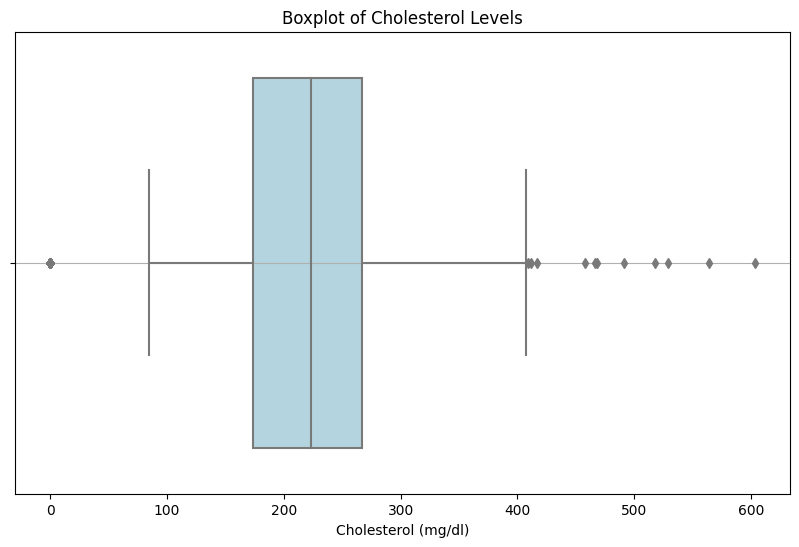

In [16]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a boxplot for the 'Cholesterol' column
sns.boxplot(x=df['Cholesterol'], color='lightblue')

# Customize the title and labels
plt.title('Boxplot of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dl)')

# Show the plot
plt.grid(axis='y')  # Add a grid for better readability
plt.show()

High levels of cholesterol in the blood can increase the risk of heart disease. ♠ So, let's check check the heart disease for those who have high cholesterol in the blood greater than 407 mg/dl (upper)

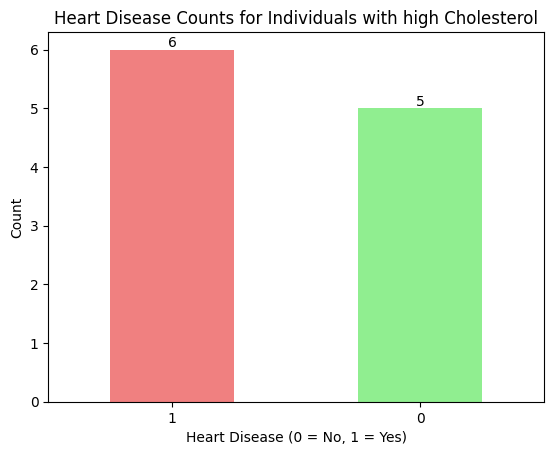

In [17]:
chol = df[df["Cholesterol"] > 407]["HeartDisease"].value_counts()

# Create a bar plot 
bars = chol.plot(kind='bar', color=['lightcoral', 'lightgreen'])

# Customize the title and labels
plt.title('Heart Disease Counts for Individuals with high Cholesterol')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Show the count on top of each bar
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.show()

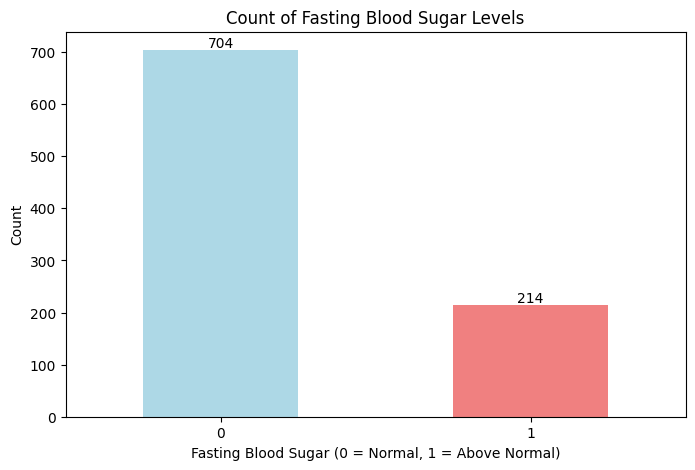

In [18]:
# Count the occurrences of each value in the 'FastingBS' column
fasting_bs_counts = df['FastingBS'].value_counts()

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a bar plot for fasting blood sugar counts
bars = fasting_bs_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])

# Customize the title and labels
plt.title('Count of Fasting Blood Sugar Levels')
plt.xlabel('Fasting Blood Sugar (0 = Normal, 1 = Above Normal)')
plt.ylabel('Count')

# Show the count on top of each bar
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.show()

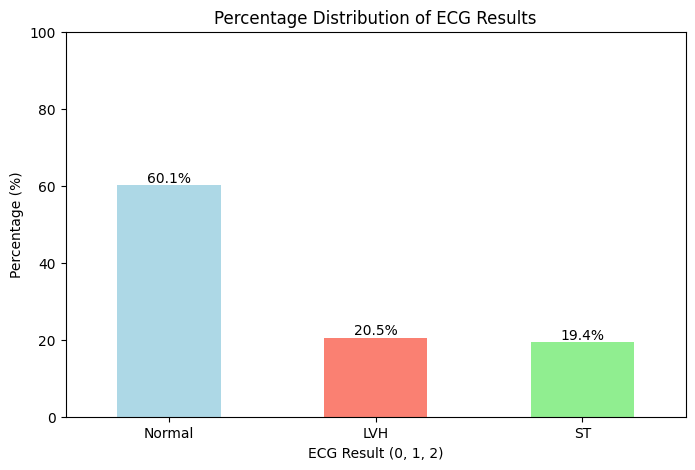

In [19]:
# Calculate the percentage of each ECG type
ecg_counts = df['RestingECG'].value_counts(normalize=True) * 100  # Normalize to get percentage

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a bar plot for ECG percentages
bars = ecg_counts.plot(kind='bar', color=['lightblue', 'salmon', 'lightgreen'])

# Customize the title and labels
plt.title('Percentage Distribution of ECG Results')
plt.xlabel('ECG Result (0, 1, 2)')
plt.ylabel('Percentage (%)')

# Show the percentage on top of each bar
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', 
             ha='center', va='bottom')

# Set y-axis limits from 0 to 100
plt.ylim(0, 100)

# Show the plot
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.show()

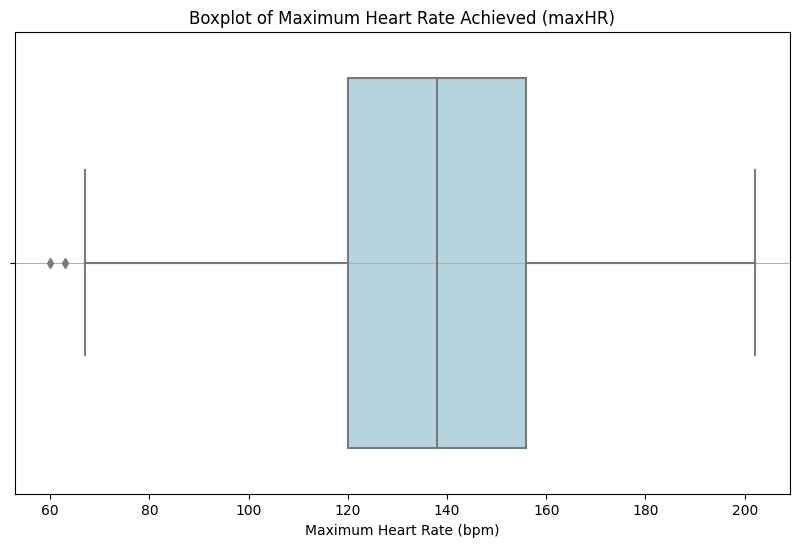

In [20]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a boxplot for the 'maxHR' column
sns.boxplot(x=df['MaxHR'], color='lightblue')

# Customize the title and labels
plt.title('Boxplot of Maximum Heart Rate Achieved (maxHR)')
plt.xlabel('Maximum Heart Rate (bpm)')

# Show the plot
plt.grid(axis='y')  # Add a grid for better readability
plt.show()

Lower values might indicate heart disease or poor heart health.♠ So, let's check check the heart disease for those who have low Max Heart Rate less than 67 (lower)

In [21]:
df[df["MaxHR"] < 67]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
370,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1


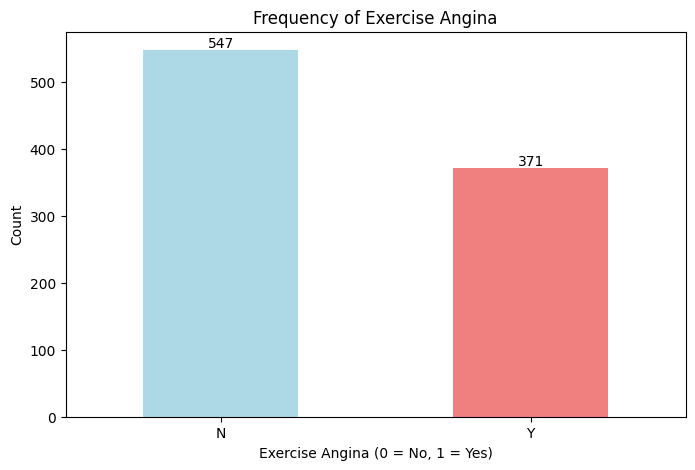

In [22]:
# Count the occurrences of each value in the 'Exercise Angina' column
exercise_angina_counts = df['ExerciseAngina'].value_counts()

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a bar plot for exercise angina counts
bars = exercise_angina_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])

# Customize the title and labels
plt.title('Frequency of Exercise Angina')
plt.xlabel('Exercise Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')

# Show the count on top of each bar
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-ticks for better readability
plt.show()

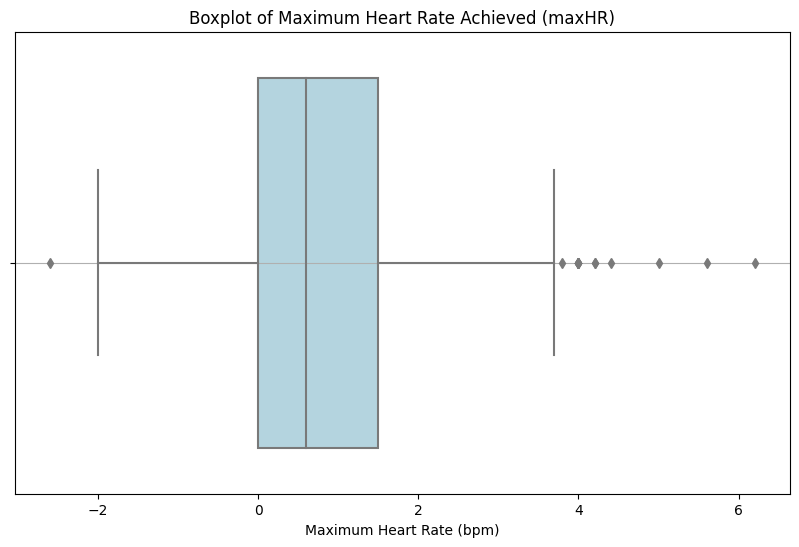

In [23]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a boxplot for the 'maxHR' column
sns.boxplot(x=df['Oldpeak'], color='lightblue')

# Customize the title and labels
plt.title('Boxplot of Maximum Heart Rate Achieved (maxHR)')
plt.xlabel('Maximum Heart Rate (bpm)')

# Show the plot
plt.grid(axis='y')  # Add a grid for better readability
plt.show()

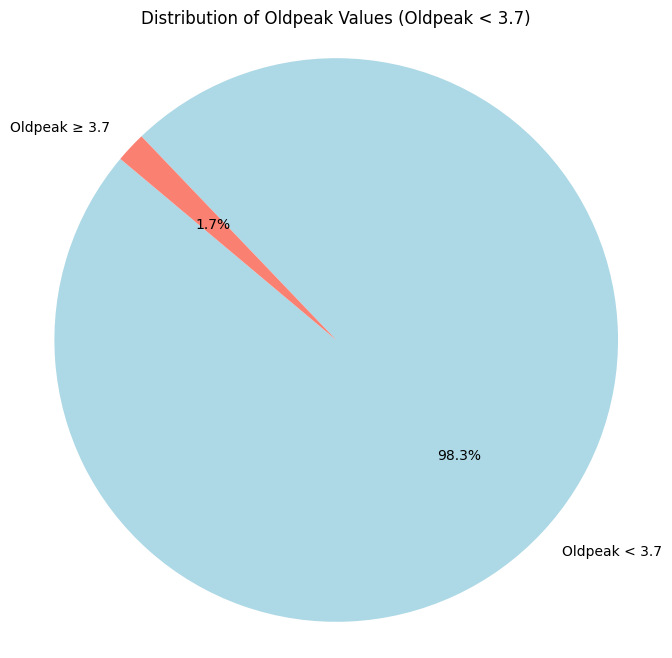

In [24]:
# Filter the dataset for Oldpeak less than 3.7
filtered_df = df[df['Oldpeak'] < 3.7]

# Count the total individuals and those with Oldpeak < 3.7
total_individuals = df.shape[0]
count_oldpeak_below_3_7 = filtered_df.shape[0]
count_oldpeak_above_3_7 = total_individuals - count_oldpeak_below_3_7

# Prepare data for pie chart
labels = ['Oldpeak < 3.7', 'Oldpeak ≥ 3.7']
sizes = [count_oldpeak_below_3_7, count_oldpeak_above_3_7]
colors = ['lightblue', 'salmon']

# Set up the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

# Customize the title
plt.title('Distribution of Oldpeak Values (Oldpeak < 3.7)')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

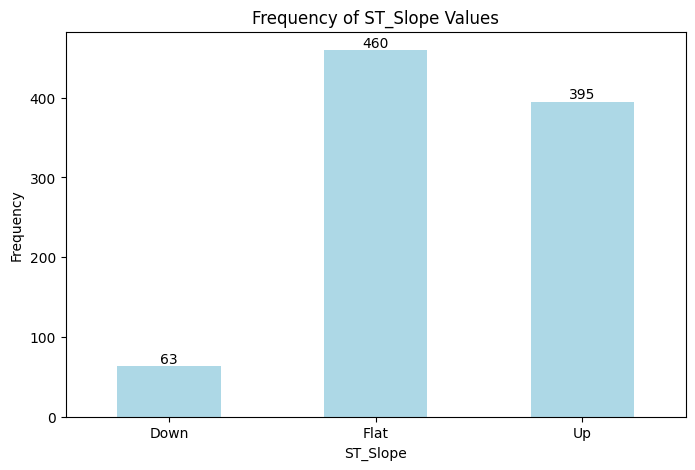

In [25]:
# Count the occurrences of each value in the 'ST_Slope' column
st_slope_counts = df['ST_Slope'].value_counts().sort_index()  # Sort by index for better visualization

# Set up the matplotlib figure
plt.figure(figsize=(8, 5))

# Create a bar plot for ST_Slope frequency
bars = st_slope_counts.plot(kind='bar', color='lightblue')

# Customize the title and labels
plt.title('Frequency of ST_Slope Values')
plt.xlabel('ST_Slope')
plt.ylabel('Frequency')

# Show the count on top of each bar
for bar in bars.patches:
    # Get the height of the bar
    height = bar.get_height()
    # Add text annotation
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', 
             ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=0)  # Rotate x-ticks for better readability

plt.show()

**Categorical Data Encoding**

In [26]:
df.select_dtypes(include="object").columns


Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [27]:
df_encodded = pd.get_dummies(data=df, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], 
                             drop_first="True")*1

df_encodded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


**Split the Data**

In [28]:
X = df_encodded.drop(columns=["HeartDisease"])
y = df_encodded["HeartDisease"]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

**Hyperparameter Tuning using RandomisedSearchCV**

In [30]:
# Create The Model
model = XGBClassifier()

# Used Hyperparameter
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
    'gamma': [0, 0.25, 0.4, 0.5, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
}

In [31]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=35, 
                                   scoring="roc_auc", cv=5, verbose=0, random_state=99)

In [32]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=35,
                   param_distributions={'colsample_bytree': [0.4, 0.5, 0.6, 0.7,
                                                             0.8, 0.9, 1.0],
                                        'gamma': [0, 0.25, 0.4, 0.5, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=99, scoring='roc_auc')

In [33]:
p = random_search.best_params_
for k, v in p.items():
    print(f"{k}={v},")

subsample=0.7,
min_child_weight=3,
max_depth=3,
learning_rate=0.1,
gamma=0,
colsample_bytree=0.5,


**Build XGBoost Classifier with Best Parameters**

In [34]:
model = XGBClassifier(
objective="binary:logistic",
subsample=0.7,
min_child_weight=3,
max_depth=3,
learning_rate=0.1,
gamma=0,
colsample_bytree=0.5,
)

In [35]:
# Cross Validation Score
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv = kf)

print(f"CROSS VALIDATION SCORE: {np.mean(scores)*100:0.2f}%")

CROSS VALIDATION SCORE: 88.23%


In [36]:
model.fit(X_train, y_train)
train_score = model.score(X_train, y_train)*100
print(f"TRAIN SCORE {train_score:0.2f}%")

TRAIN SCORE 91.14%


**Test The Model**

In [37]:
predictions = model.predict(X_test)
test_score = accuracy_score(y_test, predictions)*100
print(f"TEST SCORE {test_score:0.2f}%")

TEST SCORE 92.93%


In [38]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.92      0.93      0.92        86
           1       0.94      0.93      0.93        98

    accuracy                           0.93       184
   macro avg       0.93      0.93      0.93       184
weighted avg       0.93      0.93      0.93       184



<Figure size 800x600 with 0 Axes>

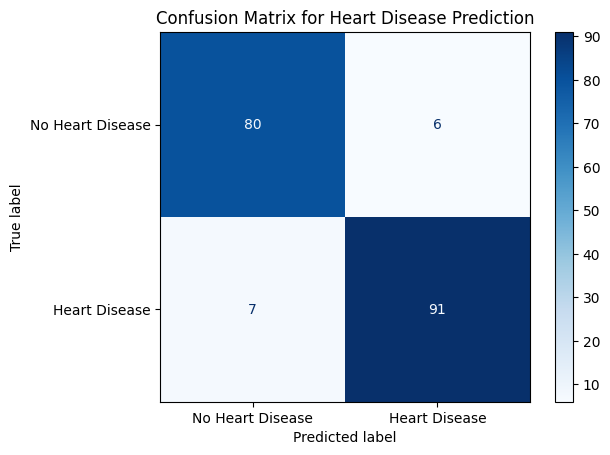

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
ticks = df["HeartDisease"].map({0:"No Heart Disease", 1:"Heart Disease"}).unique()

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Heart Disease', 'Heart Disease']).plot(cmap='Blues')
plt.title('Confusion Matrix for Heart Disease Prediction')
plt.show()

**Save the Model**

In [41]:
import pickle
pd.to_pickle(model, "model.pkl")# Save the model as a .pkl file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as model.pkl")

Model saved as model.pkl


Streamlit App Link -->  https://ssheartdiseaseprediction.streamlit.app/

Github Link --> https://github.com/siva-sankari-sivakaminathan/Heart-Disease-Prediction_Streamlit-app/tree/main